In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from scipy.stats import ttest_ind
import tkinter as tk
from tkinter import ttk, messagebox, scrolledtext
import shap


# Part One
Load the data and apply EDA

In [2]:
# read the data
# data=pd.read_csv("/Users/wuyou/Desktop/7008project/online_shoppers_intention.csv")
#data from kaggle: https://www.kaggle.com/datasets/henrysue/online-shoppers-intention
data=pd.read_csv("online_shoppers_intention.csv")
data.head(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,Feb,2,4,3,3,Returning_Visitor,False,False
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,2,1,5,Returning_Visitor,True,False
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,Feb,2,2,2,3,Returning_Visitor,False,False
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,Feb,2,4,1,2,Returning_Visitor,False,False


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

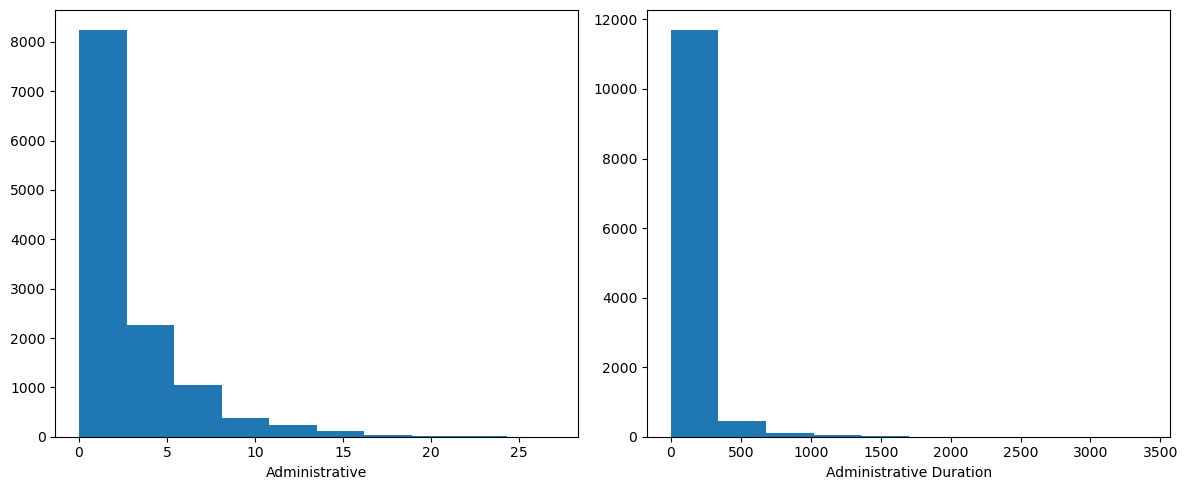

0.000000      5903
4.000000        56
5.000000        53
7.000000        45
11.000000       42
              ... 
68.014286        1
362.300000       1
90.700000        1
760.900000       1
150.357143       1
Name: Administrative_Duration, Length: 3335, dtype: int64


In [4]:
#administraive
#hist
fig, axes = plt.subplots(1, 2, figsize=(12, 5)) 
axes[0].hist(data['Administrative'])
axes[0].set_xlabel('Administrative')
axes[1].hist(data['Administrative_Duration'])
axes[1].set_xlabel('Administrative Duration')
plt.tight_layout()
plt.show()
print(pd.value_counts(data['Administrative_Duration']))

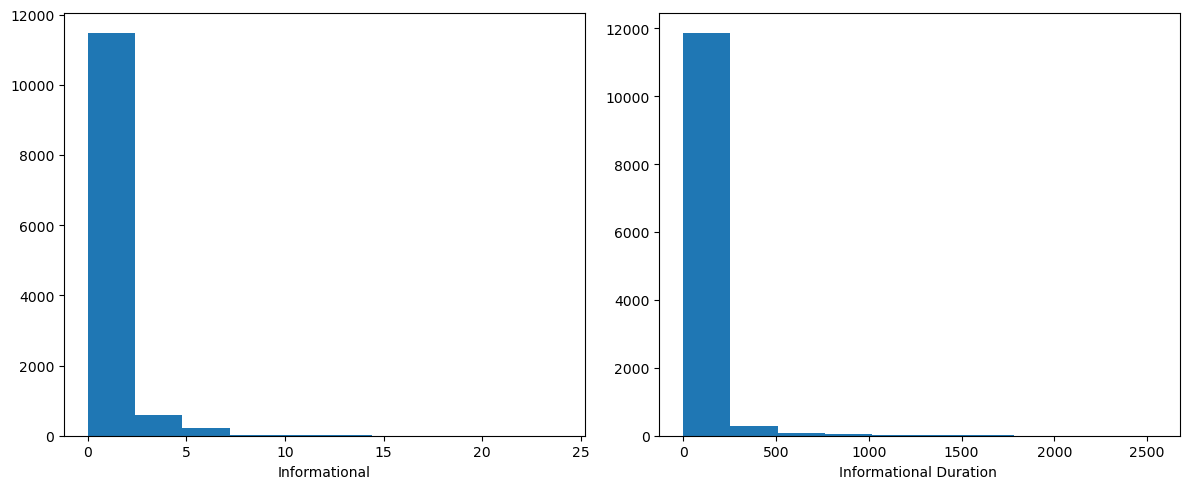

In [5]:
#information
#hist
fig, axes = plt.subplots(1, 2, figsize=(12, 5)) 
axes[0].hist(data['Informational'])
axes[0].set_xlabel('Informational')
axes[1].hist(data['Informational_Duration'])
axes[1].set_xlabel('Informational Duration ')
plt.tight_layout()
plt.show()

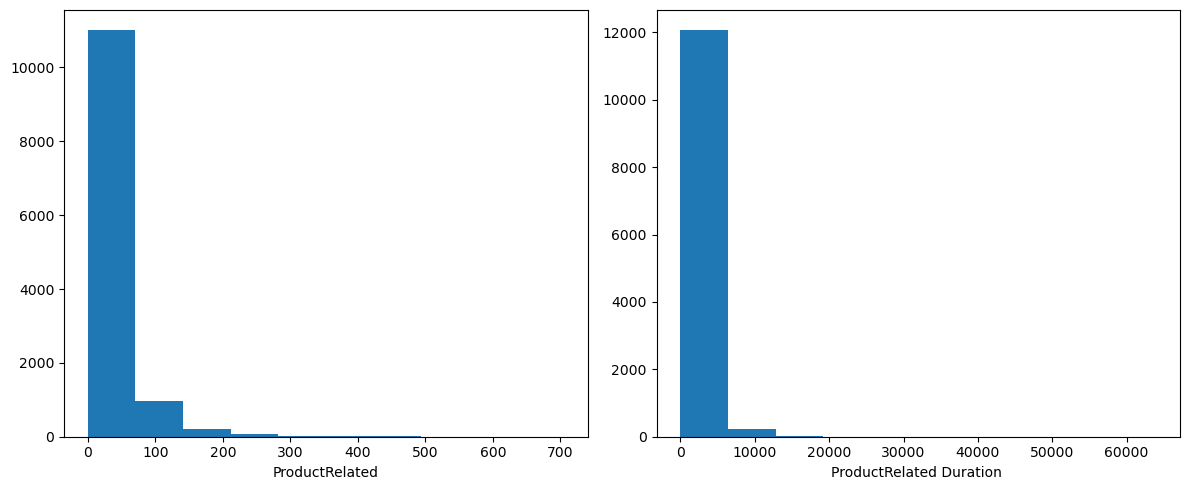

In [6]:
#product
#hist
fig, axes = plt.subplots(1, 2, figsize=(12, 5)) 
axes[0].hist(data['ProductRelated'])
axes[0].set_xlabel('ProductRelated')
axes[1].hist(data['ProductRelated_Duration'])
axes[1].set_xlabel('ProductRelated Duration ')
plt.tight_layout()
plt.show()

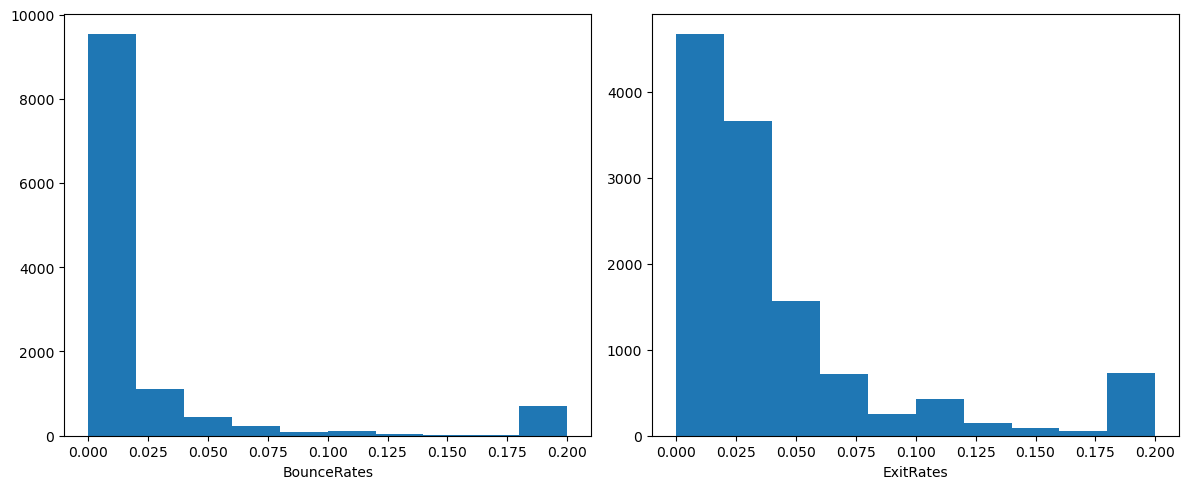

0.200000    710
0.100000    338
0.050000    329
0.033333    291
0.066667    267
           ... 
0.021816      1
0.015787      1
0.010302      1
0.014534      1
0.029031      1
Name: ExitRates, Length: 4777, dtype: int64

In [7]:
#bounce/exit rate
#hist
fig, axes = plt.subplots(1, 2, figsize=(12, 5)) 
axes[0].hist(data['BounceRates'])
axes[0].set_xlabel('BounceRates')
axes[1].hist(data['ExitRates'])
axes[1].set_xlabel('ExitRates')
plt.tight_layout()
plt.show()
pd.value_counts(data['ExitRates'])

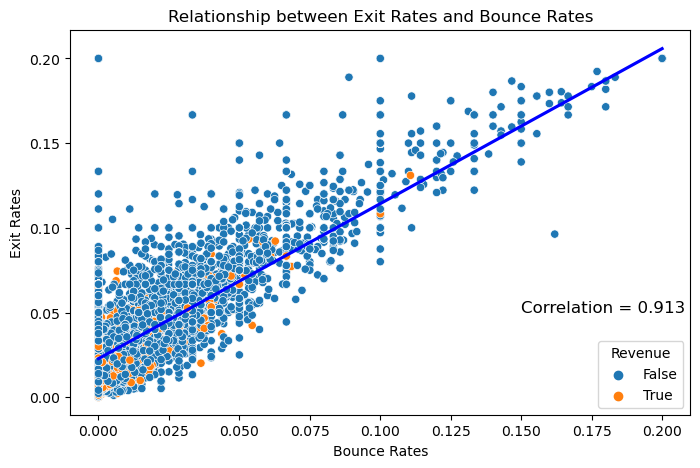

In [8]:
# relationship between the exit rates and bounce rates
plt.figure(figsize=(8, 5))
sns.scatterplot(x='BounceRates', y='ExitRates', hue='Revenue', data=data)
sns.regplot(x='BounceRates', y='ExitRates', data=data, scatter=False, color='blue')
plt.title('Relationship between Exit Rates and Bounce Rates')
plt.xlabel('Bounce Rates')
plt.ylabel('Exit Rates')
plt.text(0.15, 0.05, 'Correlation = 0.913', fontsize=12)
plt.show()

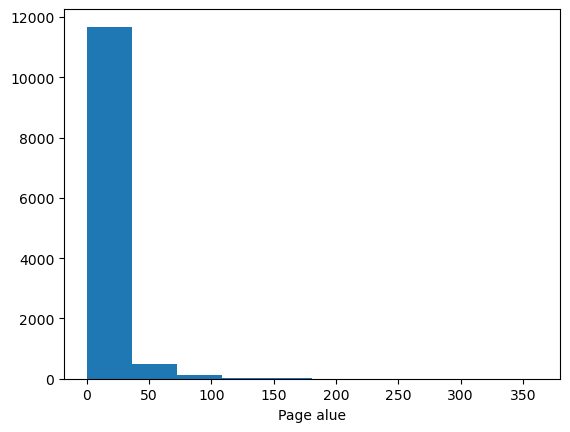

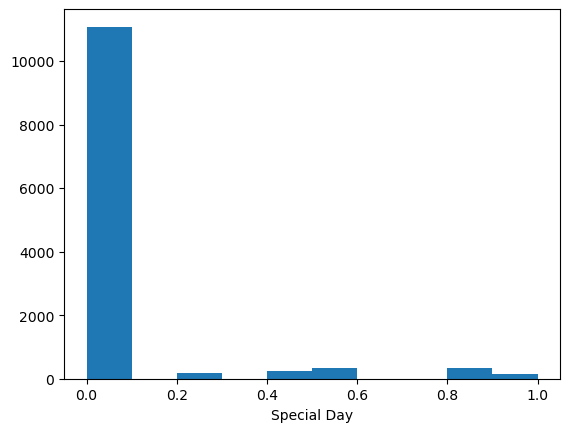

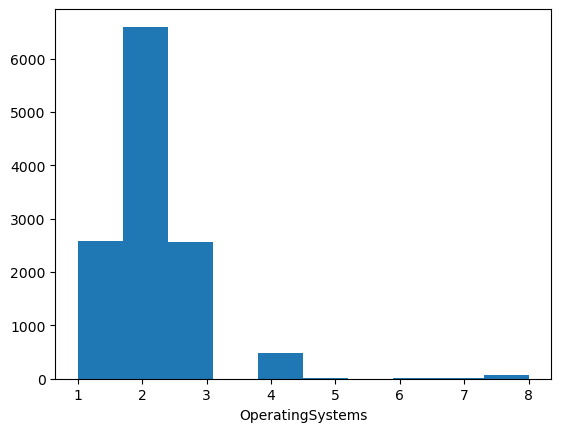

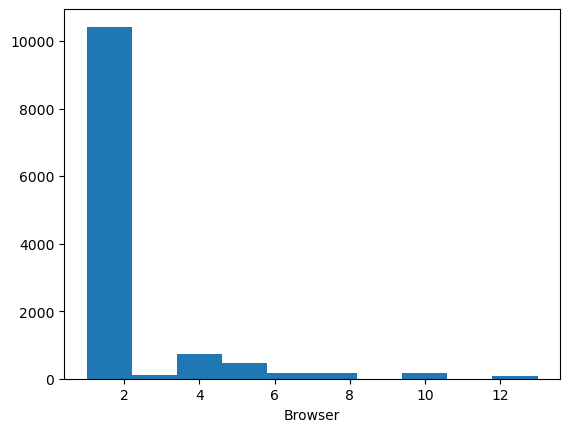

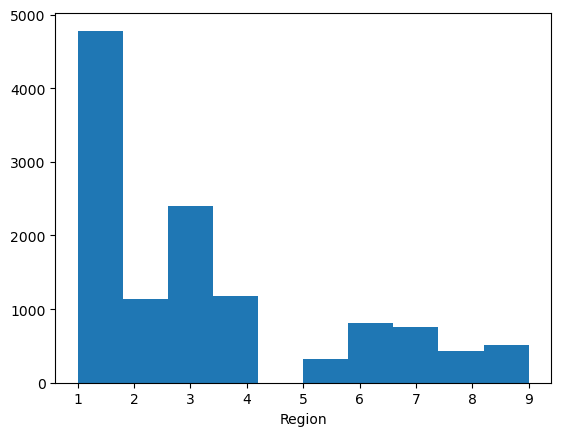

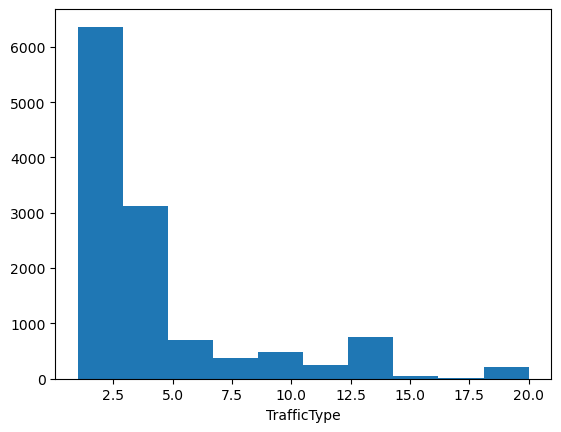

In [9]:
# page values
plt.hist(data['PageValues'])
plt.xlabel('Page alue')
plt.show()
# special day
plt.hist(data['SpecialDay'])
plt.xlabel('Special Day')
plt.show()
#OperationSystems
plt.hist(data['OperatingSystems'])
plt.xlabel('OperatingSystems')
plt.show()
#Browser
plt.hist(data['Browser'])
plt.xlabel('Browser')
plt.show()
#Region
plt.hist(data['Region'])
plt.xlabel('Region')
plt.show()
#TrafficType
plt.hist(data['TrafficType'])
plt.xlabel('TrafficType')
plt.show()

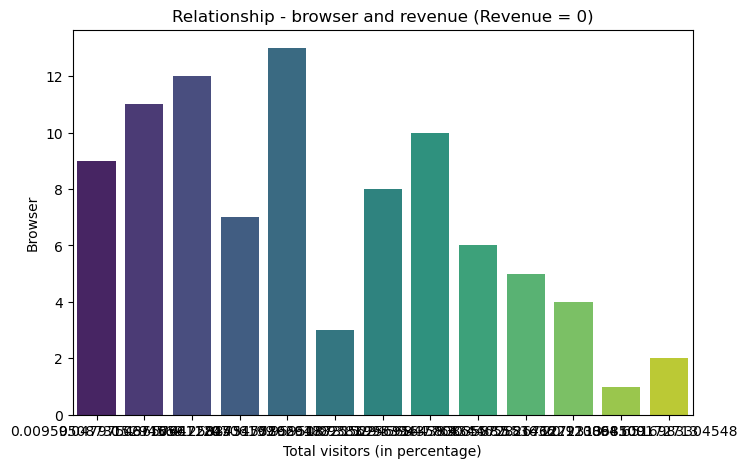

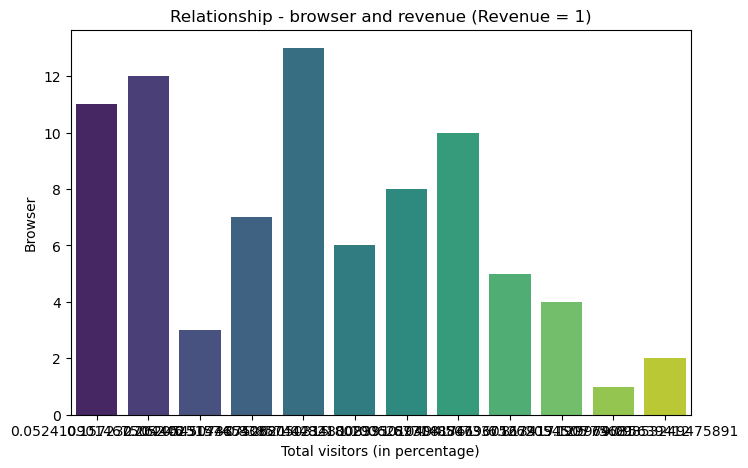

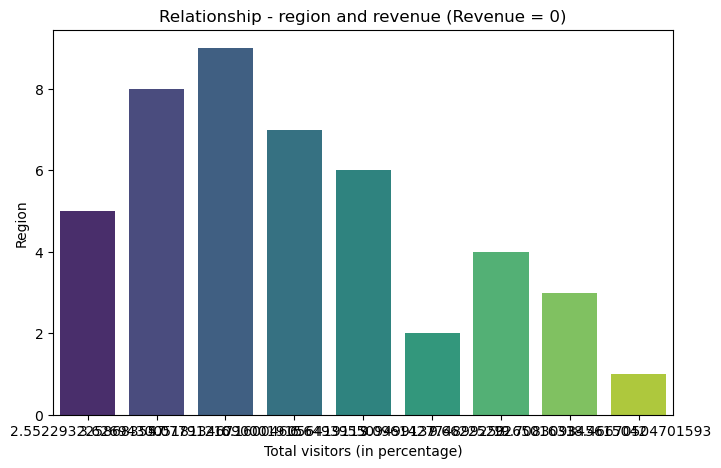

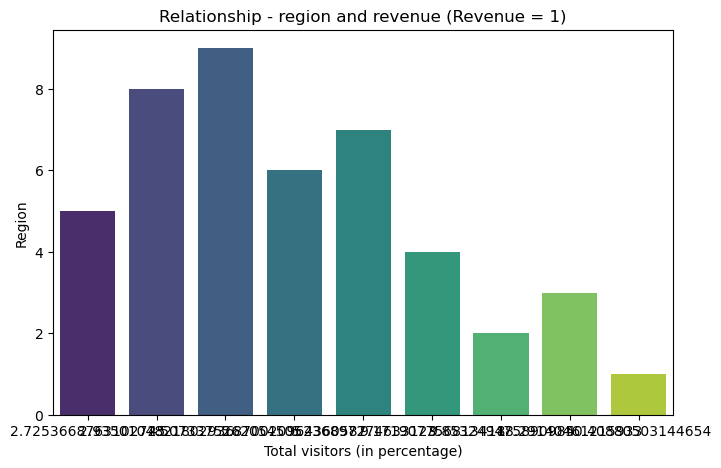

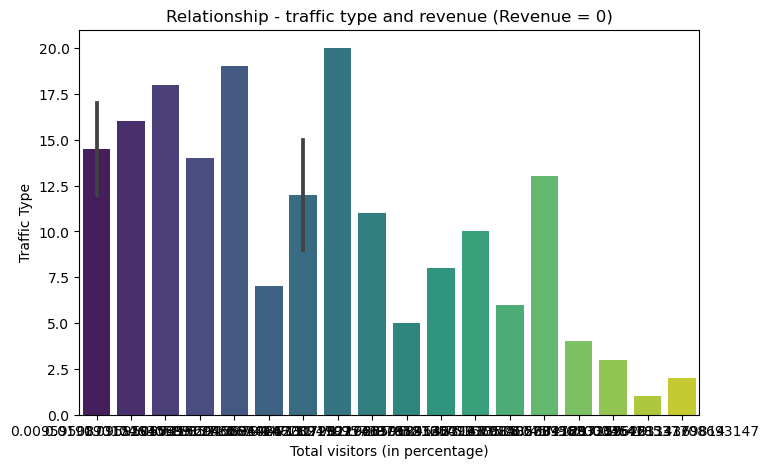

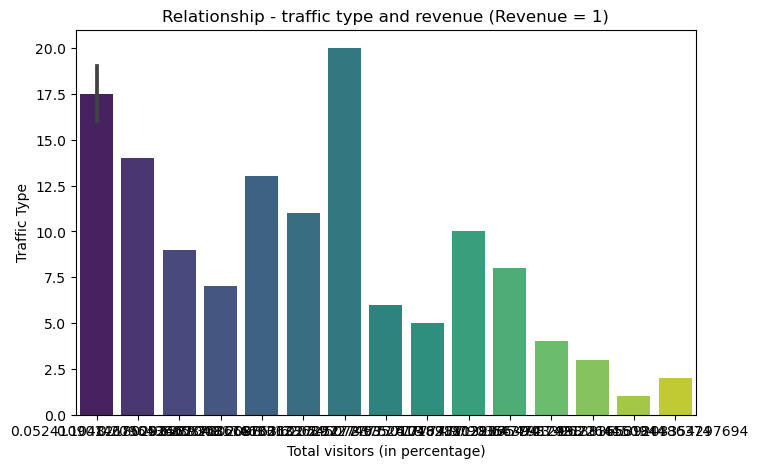

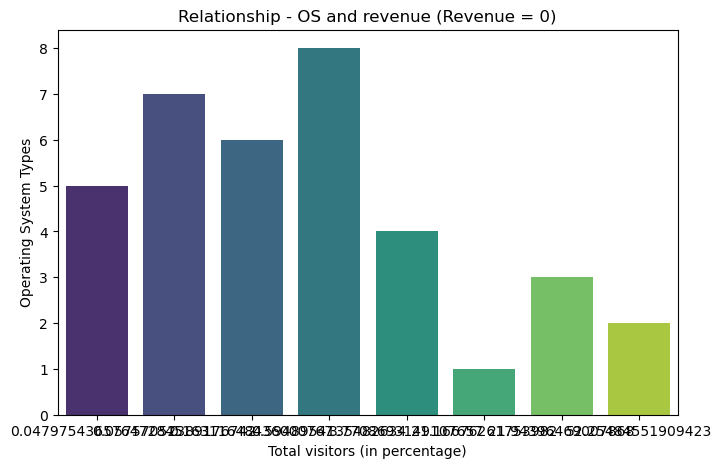

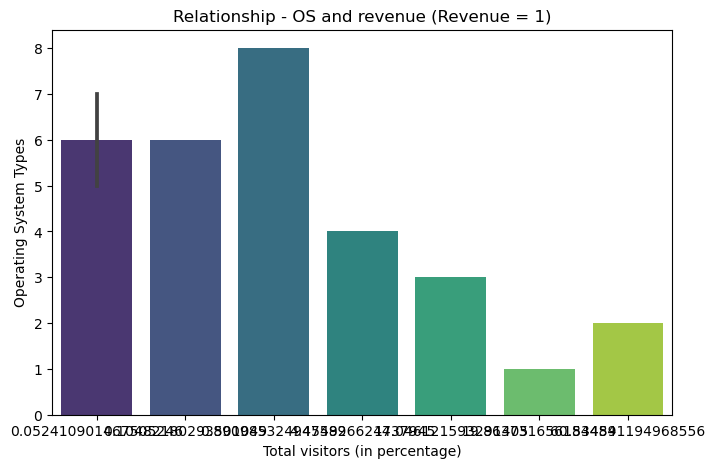

In [10]:
# relationship between browser and different revenue
trend = data.groupby(['Browser', 'Revenue']).size().reset_index(name='Freq')
a = trend[trend['Revenue'] == 0]
a['perc'] = (a['Freq'] / a['Freq'].sum()) * 100
b = trend[trend['Revenue'] == 1]
b['perc'] = (b['Freq'] / b['Freq'].sum()) * 100

plt.figure(figsize=(8, 5))
sns.barplot(x='perc', y='Browser', data=a, palette='viridis')
plt.title('Relationship - browser and revenue (Revenue = 0)')
plt.xlabel('Total visitors (in percentage)')
plt.ylabel('Browser')
plt.show()

plt.figure(figsize=(8, 5))
sns.barplot(x='perc', y='Browser', data=b, palette='viridis')
plt.title('Relationship - browser and revenue (Revenue = 1)')
plt.xlabel('Total visitors (in percentage)')
plt.ylabel('Browser')
plt.show()
# relationship between region and different revenue
trend = data.groupby(['Region', 'Revenue']).size().reset_index(name='Freq')
a = trend[trend['Revenue'] == 0]
a['perc'] = (a['Freq'] / a['Freq'].sum()) * 100
b = trend[trend['Revenue'] == 1]
b['perc'] = (b['Freq'] / b['Freq'].sum()) * 100

plt.figure(figsize=(8, 5))
sns.barplot(x='perc', y='Region', data=a, palette='viridis')
plt.title('Relationship - region and revenue (Revenue = 0)')
plt.xlabel('Total visitors (in percentage)')
plt.ylabel('Region')
plt.show()

plt.figure(figsize=(8, 5))
sns.barplot(x='perc', y='Region', data=b, palette='viridis')
plt.title('Relationship - region and revenue (Revenue = 1)')
plt.xlabel('Total visitors (in percentage)')
plt.ylabel('Region')
plt.show()

# relationship between traffic type and different revenue
trend = data.groupby(['TrafficType', 'Revenue']).size().reset_index(name='Freq')
a = trend[trend['Revenue'] == 0]
a['perc'] = (a['Freq'] / a['Freq'].sum()) * 100
b = trend[trend['Revenue'] == 1]
b['perc'] = (b['Freq'] / b['Freq'].sum()) * 100

plt.figure(figsize=(8, 5))
sns.barplot(x='perc', y='TrafficType', data=a, palette='viridis')
plt.title('Relationship - traffic type and revenue (Revenue = 0)')
plt.xlabel('Total visitors (in percentage)')
plt.ylabel('Traffic Type')
plt.show()

plt.figure(figsize=(8, 5))
sns.barplot(x='perc', y='TrafficType', data=b, palette='viridis')
plt.title('Relationship - traffic type and revenue (Revenue = 1)')
plt.xlabel('Total visitors (in percentage)')
plt.ylabel('Traffic Type')
plt.show()
# relationship between operating systems and different revenue

trend = data.groupby(['OperatingSystems', 'Revenue']).size().reset_index(name='Freq')
a = trend[trend['Revenue'] == 0]
a['perc'] = (a['Freq'] / a['Freq'].sum()) * 100
b = trend[trend['Revenue'] == 1]
b['perc'] = (b['Freq'] / b['Freq'].sum()) * 100
plt.figure(figsize=(8, 5))

sns.barplot(x='perc', y='OperatingSystems', data=a, palette='viridis')
plt.title('Relationship - OS and revenue (Revenue = 0)')
plt.xlabel('Total visitors (in percentage)')
plt.ylabel('Operating System Types')
plt.show()

plt.figure(figsize=(8, 5))
sns.barplot(x='perc', y='OperatingSystems', data=b, palette='viridis')
plt.title('Relationship - OS and revenue (Revenue = 1)')
plt.xlabel('Total visitors (in percentage)')
plt.ylabel('Operating System Types')
plt.show()



Month: ['Feb' 'Mar' 'May' 'Oct' 'June' 'Jul' 'Aug' 'Nov' 'Sep' 'Dec']


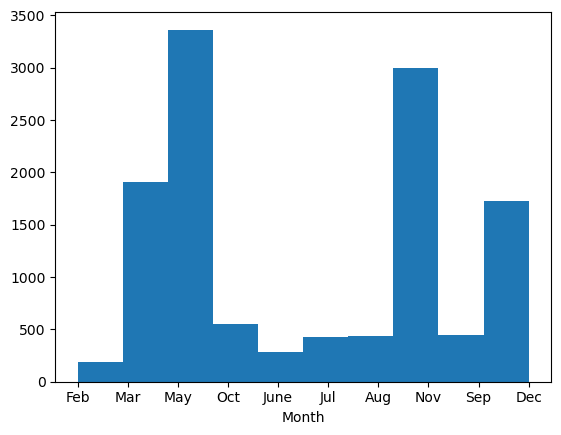

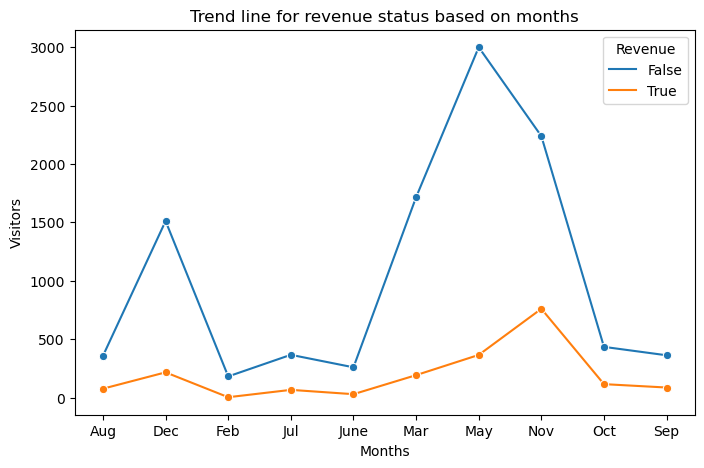

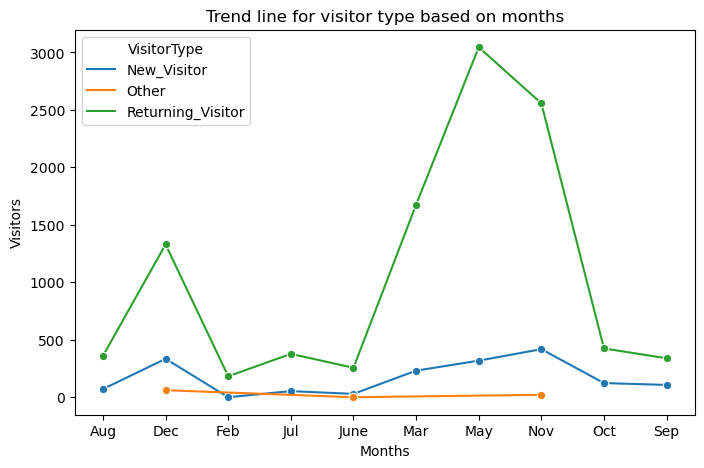

In [11]:
#object values
#month
#print the value of month
print("Month:",data['Month'].unique())
plt.hist(data["Month"])
plt.xlabel('Month')
plt.show()
# trend line for revenue based on months
trend = data.groupby(['Month', 'Revenue']).size().reset_index(name='Frequency')
plt.figure(figsize=(8, 5))
sns.lineplot(x='Month', y='Frequency', hue='Revenue', data=trend, marker='o')
plt.title('Trend line for revenue status based on months')
plt.xlabel('Months')
plt.ylabel('Visitors')
plt.show()

# trend line for visitor type based on months
trend = data.groupby(['VisitorType', 'Month']).size().reset_index(name='Frequency')
plt.figure(figsize=(8, 5))
sns.lineplot(x='Month', y='Frequency', hue='VisitorType', data=trend, marker='o')
plt.title('Trend line for visitor type based on months')
plt.xlabel('Months')
plt.ylabel('Visitors')
plt.show()

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64


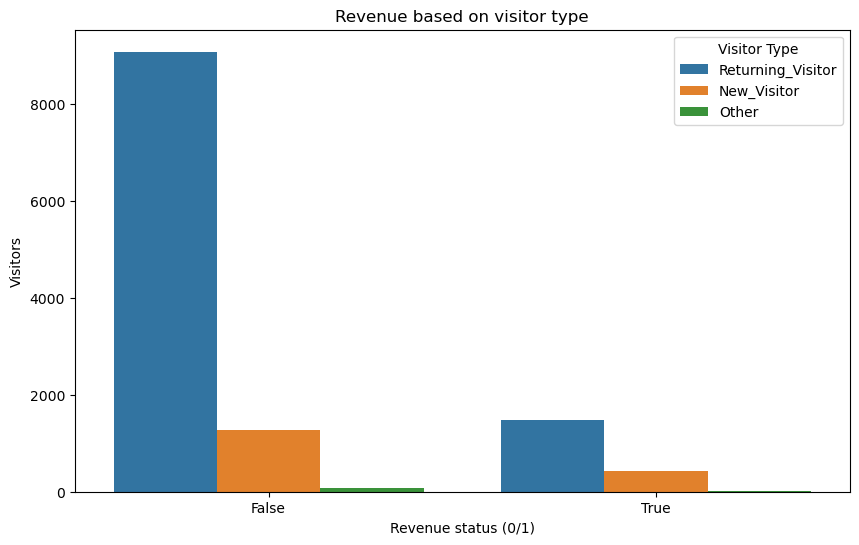

In [12]:
#visitor type
print(pd.value_counts(data['VisitorType']))
# revenue based on visitor type
plt.figure(figsize=(10, 6))
sns.countplot(x='Revenue', hue='VisitorType', data=data)
plt.title('Revenue based on visitor type')
plt.xlabel('Revenue status (0/1)')
plt.ylabel('Visitors')
plt.legend(title='Visitor Type', loc='best')
plt.show()

In [13]:
#our target value: revenue
pd.value_counts(data['Revenue'])

False    10422
True      1908
Name: Revenue, dtype: int64

False    9462
True     2868
Name: Weekend, dtype: int64


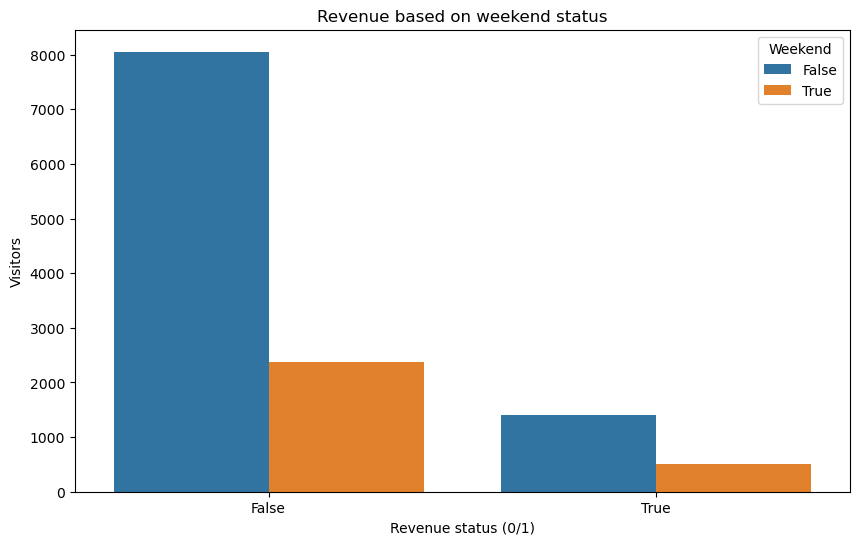

In [14]:
#another bool value: weekend
print(pd.value_counts(data['Weekend']))
# revenue based on weekend status
plt.figure(figsize=(10, 6))
sns.countplot(x='Revenue', hue='Weekend', data=data)
plt.title('Revenue based on weekend status')
plt.xlabel('Revenue status (0/1)')
plt.ylabel('Visitors')
plt.legend(title='Weekend', loc='best')
plt.show()

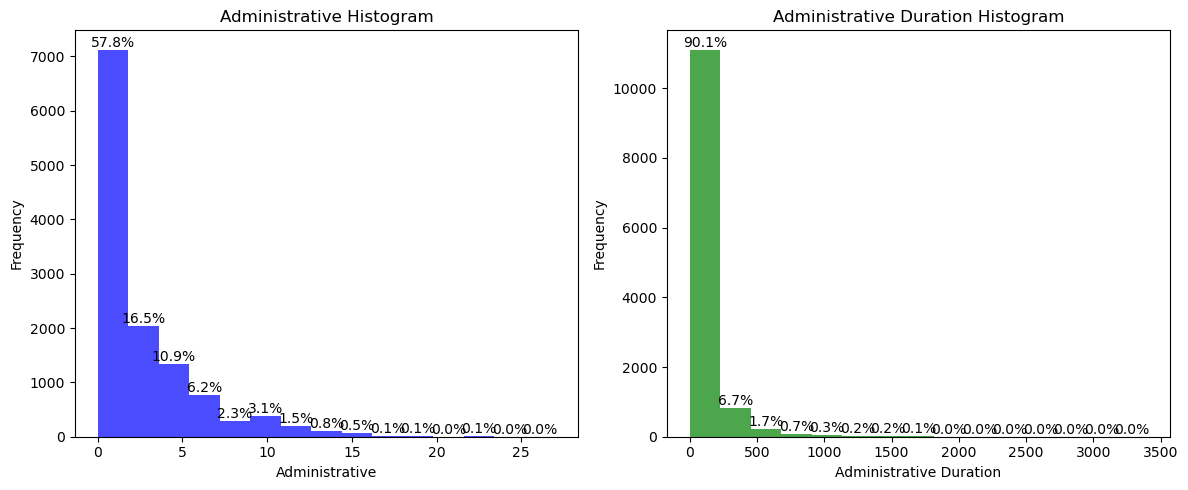

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
# hist
counts, bins, patches = axes[0].hist(data['Administrative'], bins=15, color='blue', alpha=0.7)
total = counts.sum() 
for count, bin_edge in zip(counts, bins):
    # percentage
    percentage = f"{(count / total * 100):.1f}%"
    axes[0].text(bin_edge + (bins[1] - bins[0]) / 2, count, percentage,
                 ha='center', va='bottom', fontsize=10)
axes[0].set_title('Administrative Histogram')
axes[0].set_xlabel('Administrative')
axes[0].set_ylabel('Frequency')


counts, bins, patches = axes[1].hist(data['Administrative_Duration'], bins=15, color='green', alpha=0.7)
total = counts.sum()
for count, bin_edge in zip(counts, bins):
    percentage = f"{(count / total * 100):.1f}%"
    axes[1].text(bin_edge + (bins[1] - bins[0]) / 2, count, percentage,
                 ha='center', va='bottom', fontsize=10)
axes[1].set_title('Administrative Duration Histogram')
axes[1].set_xlabel('Administrative Duration')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

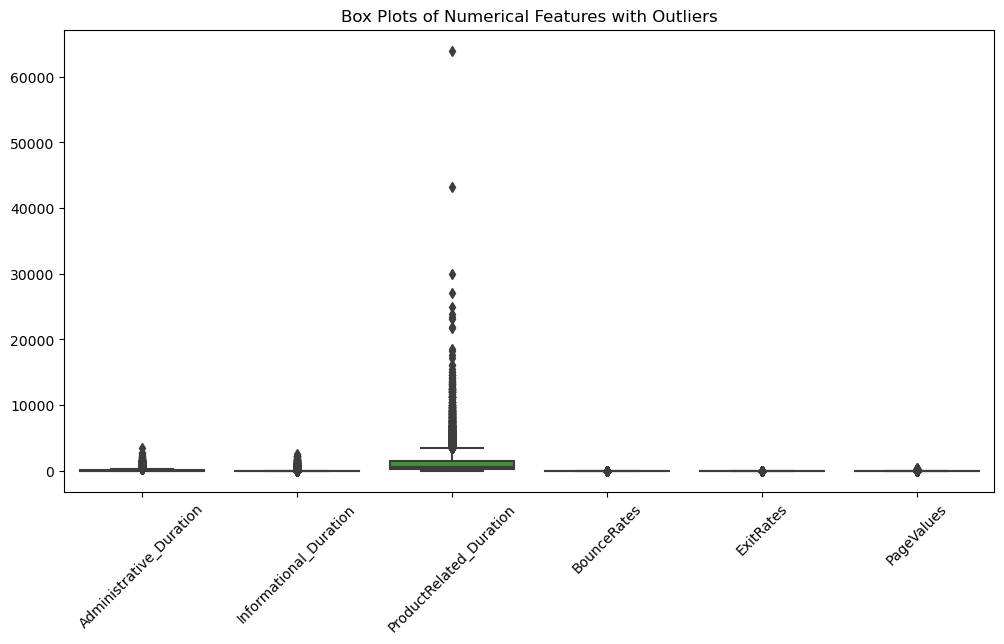

Percentage of Outliers:
Administrative_Duration    1.881590
Informational_Duration     1.865369
ProductRelated_Duration    1.776156
BounceRates                5.742092
ExitRates                  5.782644
PageValues                 2.100568
dtype: float64


In [16]:
#outliers

numerical_variable=['Administrative_Duration','Informational_Duration','ProductRelated_Duration','BounceRates', 'ExitRates', 'PageValues']
# Calculate z-scores for each column
z_scores = zscore(data[numerical_variable])

# Find values more than 3 standard deviations away from the mean
outliers = (z_scores > 3) | (z_scores < -3)

# Calculate the percentage of outliers for each column
percentage_outliers = outliers.mean(axis=0) * 100

# Plotting the box plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[numerical_variable])
plt.title('Box Plots of Numerical Features with Outliers')
plt.xticks(rotation=45)
plt.show()

# Displaying the percentage of outliers
print("Percentage of Outliers:")
print(percentage_outliers)

Outlier Result: we use z-score to calculate outliers.ProductRelated_Duration has a high number of outliers, which need to be further analyzed to determine the source of these outliers.
BounceRates and ExitRates are more centrally distributed and have fewer outliers.

It is necessary to decide whether to handle the outliers,e.g.,delete them or choose robust algorithms in the following steps.


# Part Two
Data preprocessing, including deal with category, bool variable and normalization.

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [18]:
# category variable and numerical variable
category_variable=['Administrative','Informational','ProductRelated','Month','OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'SpecialDay']
numerical_variable=['Administrative_Duration','Informational_Duration','ProductRelated_Duration','BounceRates', 'ExitRates', 'PageValues']

In [19]:
# deal with bool and object type
categorical_features = ['Month', 'VisitorType', 'Weekend', 'Revenue']

# Create a LabelEncoder instance
le = LabelEncoder()

# Convert categorical features to numeric labels
for feature in categorical_features:
    data[feature] = le.fit_transform(data[feature])
    print(feature,data[feature].value_counts())

Month 6    3364
7    2998
5    1907
1    1727
8     549
9     448
0     433
3     432
4     288
2     184
Name: Month, dtype: int64
VisitorType 2    10551
0     1694
1       85
Name: VisitorType, dtype: int64
Weekend 0    9462
1    2868
Name: Weekend, dtype: int64
Revenue 0    10422
1     1908
Name: Revenue, dtype: int64


In [20]:
data.corr()["Revenue"].sort_values(ascending=False)

Revenue                    1.000000
PageValues                 0.492569
ProductRelated             0.158538
ProductRelated_Duration    0.152373
Administrative             0.138917
Informational              0.095200
Administrative_Duration    0.093587
Month                      0.080150
Informational_Duration     0.070345
Weekend                    0.029295
Browser                    0.023984
TrafficType               -0.005113
Region                    -0.011595
OperatingSystems          -0.014668
SpecialDay                -0.082305
VisitorType               -0.104726
BounceRates               -0.150673
ExitRates                 -0.207071
Name: Revenue, dtype: float64

In [21]:
#standardize numerical value
data[numerical_variable] = StandardScaler().fit_transform(data[numerical_variable])



In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  int64  
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

# Part Three
Data modeling, including linear regression and random forest.

In [23]:
#data modelling
revenue=data['Revenue']
copy=data
x=copy.drop(['Revenue'],axis=1)
x


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0,-0.457191,0,-0.244931,1,-0.624348,3.667189,3.229316,-0.317178,0.0,2,1,1,1,1,2,0
1,0,-0.457191,0,-0.244931,2,-0.590903,-0.457683,1.171473,-0.317178,0.0,2,2,2,1,2,2,0
2,0,-0.457191,0,-0.244931,1,-0.624348,3.667189,3.229316,-0.317178,0.0,2,4,1,9,3,2,0
3,0,-0.457191,0,-0.244931,2,-0.622954,0.573535,1.994610,-0.317178,0.0,2,3,2,2,4,2,0
4,0,-0.457191,0,-0.244931,10,-0.296430,-0.045196,0.142551,-0.317178,0.0,2,3,3,1,4,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,0.363075,0,-0.244931,53,0.307822,-0.310366,-0.288966,0.342125,0.0,1,4,6,1,1,2,1
12326,0,-0.457191,0,-0.244931,5,-0.380957,-0.457683,-0.447364,-0.317178,0.0,7,3,2,1,8,2,1
12327,0,-0.457191,0,-0.244931,6,-0.528063,1.261014,0.897093,-0.317178,0.0,7,3,2,1,13,2,1
12328,4,-0.032916,0,-0.244931,15,-0.443536,-0.457683,-0.453140,-0.317178,0.0,7,2,2,3,11,2,0


In [24]:
#random forest
x_train,x_test,y_train,y_test=train_test_split(x, revenue, test_size=0.1)
model=RandomForestClassifier()
model.fit(x_train,y_train)
predict=model.predict(x_test)
accuracy=accuracy_score(predict,y_test)
print(f"accuracy rate of Random Forest is:{accuracy:.4f}")
print(classification_report(y_test,predict))

accuracy rate of Random Forest is:0.8994
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      1039
           1       0.74      0.56      0.64       194

    accuracy                           0.90      1233
   macro avg       0.83      0.76      0.79      1233
weighted avg       0.89      0.90      0.89      1233



<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

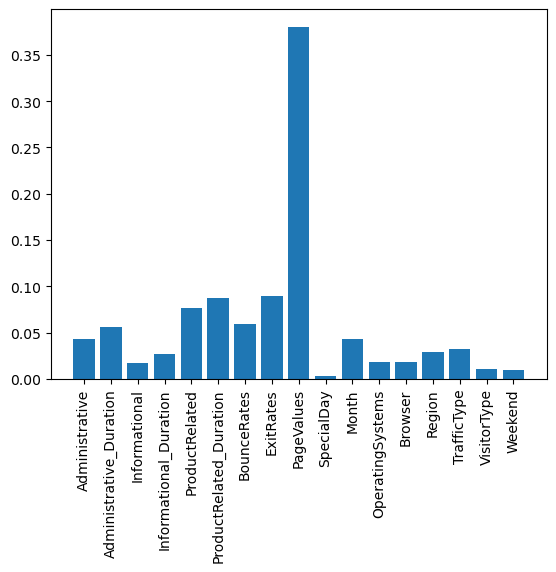

In [25]:
#importance 
imp=model.feature_importances_
plt.bar(range(len(imp)),imp)
plt.xticks(range(len(imp)),x_train.columns,rotation=90)
plt.tight_layout


In [26]:
import shap
import matplotlib.pyplot as plt

# SHAP
explainer = shap.TreeExplainer(model)  
shap_values = explainer.shap_values(x_test)


SHAP: (1233, 17, 2)


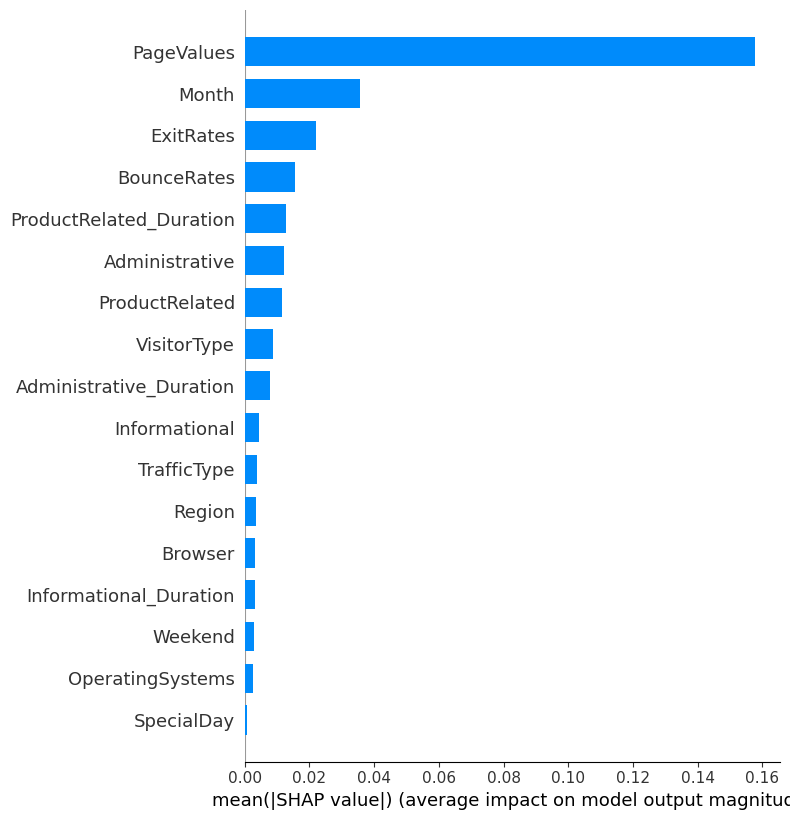

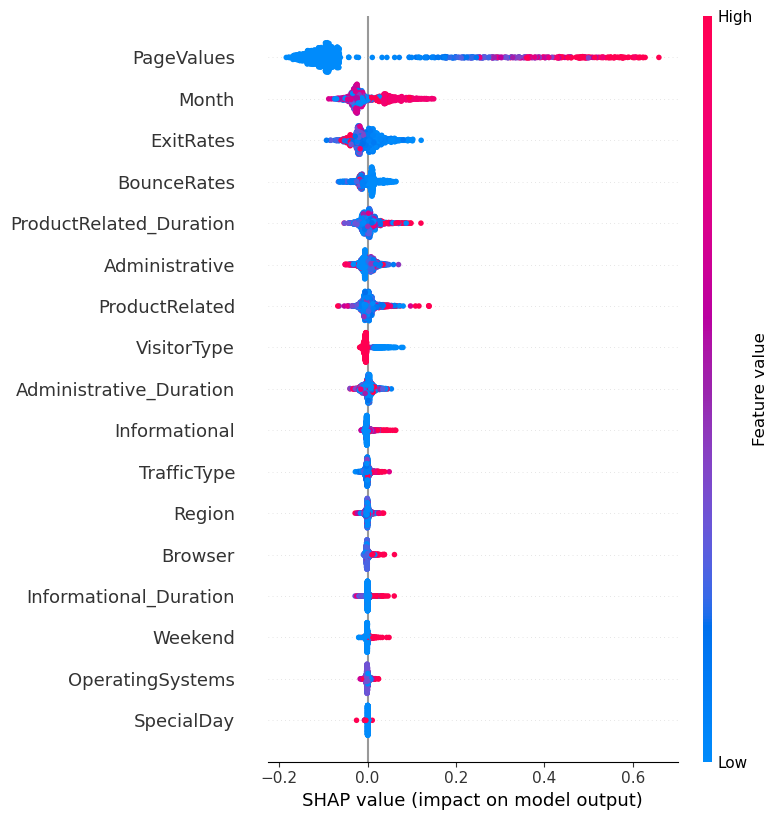

In [27]:
print("SHAP:", np.array(shap_values).shape)
shap.summary_plot(shap_values[...,1], x_test, plot_type="bar")  
shap.summary_plot(shap_values[...,1], x_test, plot_type="dot")


In [28]:
shap.initjs()
# character importance
sample_index = 15
shap.force_plot(explainer.expected_value[1], shap_values[...,1][sample_index], x_test.iloc[sample_index])

#sample_index = 5 
#shap.force_plot(explainer.expected_value[1], shap_values[...,1][sample_index], x_test.iloc[sample_index])


In [29]:
# prob
x_test['predicted_prob'] = model.predict_proba(x_test)[:, 1]

threshold = 0.7  
experiment_group = x_test[x_test['predicted_prob'] > threshold]
control_group = x_test.sample(n=len(experiment_group), random_state=42)

experiment_revenue = y_test.loc[experiment_group.index].mean()
control_revenue = y_test.loc[control_group.index].mean()

print(f"Conversion rate of experimental group: {experiment_revenue:.2%}")
print(f"Conversion rate of control group: {control_revenue:.2%}")

# difference

t_stat, p_value = ttest_ind(
    y_test.loc[experiment_group.index],
    y_test.loc[control_group.index],
    equal_var=False
)

print(f"t value: {t_stat:.4f}, p value: {p_value:.4f}")


Conversion rate of experimental group: 91.14%
Conversion rate of control group: 13.92%
t value: 15.2256, p value: 0.0000


In [30]:


regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(x_train, y_train)


RandomForestRegressor(random_state=42)

In [31]:
# predict conversion
x_test=x_test.drop('predicted_prob',axis=1)
y_pred = regressor.predict(x_test.iloc[-1].values.reshape(1,-1))


In [32]:
def conversion_rate(colname:str,rate:float):
    # if PageValues increase 2%
    X_test_modified=x_test

    X_test_modified[colname] = X_test_modified[colname] * (1+rate)  
    # PageValues increase 2%
    y_pred_modified = regressor.predict(X_test_modified)

    conversion_rate_change = y_pred_modified.mean() - y_pred.mean()
    
    return conversion_rate_change


colname='PageValues'
rate=0.1
a=conversion_rate(colname,rate)
print(f"When {colname} increases {rate*100:.2f}% , the customer purchase rate increasing {a*100:.2f}% on average.")

When PageValues increases 10.00% , the customer purchase rate increasing 1.33% on average.


# Part Four
Develop an interface to show how the variable affected conversion rate

In [33]:
def chatbox():
    print("Welcome to experince the conversion rate Page!")
    print("Type 'exit' to end the conversation.")

    exit_instruction = ["exit", ":q"]
    while True:
        colname = input(f"\nPlease enter the name of the Increasing Value({data.columns}): ").strip()
        if colname.lower() in exit_instruction:
            print("bye")
            break
        
        rate = input("\nPlease enter the expected increasing rate(it must be greater than 0,only numeric): ").strip()
        if rate.lower() in exit_instruction:
            print("bye")
            break
        else:
            rate=float(rate)

        if colname not in data.columns:
            print(f"{colname} not in data.columns,Please try it again")
            break 

        if rate <0:
            print("rate must be greater than 0,Please try it again")
            break

        a=conversion_rate(colname,rate)
        print(f"\nWhen {colname} increases {rate:.2%} , the customer purchase rate increasing {a:.2%} on average.")


# chatbox()

In [34]:
root = tk.Tk()
root.title("Value Increasing App")
root.geometry("400x300")

style = ttk.Style()
style.configure("TLabel", font=("Helvetica", 12))
style.configure("TButton", font=("Helvetica", 12))
style.configure("TEntry", font=("Helvetica", 12))
style.configure("TCombobox", font=("Helvetica", 12))

ttk.Label(root, text="Please select the name of the Increasing Value").pack(pady=10)
options = ['Administrative', 'Administrative_Duration', 'Informational',
           'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
           'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
           'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
           'Weekend']
selected_option = tk.StringVar()
combobox = ttk.Combobox(root, textvariable=selected_option, values=options)
combobox.pack(pady=5)

ttk.Label(root, text="Please enter the expected increasing rate").pack(pady=10)
rate_var = tk.StringVar()
rate_entry = ttk.Entry(root, textvariable=rate_var)
rate_entry.pack(pady=5)

def on_go_button_click():
    try:
        rate = float(rate_var.get())
        if rate <= 0:
            raise ValueError("The rate must be greater than 0.")
        selected_value = selected_option.get()
        if not selected_value:
            raise ValueError("Please select a value.")
        a=conversion_rate(selected_value,float(rate))
        result_text.set(f"\nWhen {selected_value} increases {rate:.2%} , the customer purchase rate increasing {a:.2%} on average.") 
    except ValueError as e:
        messagebox.showerror("Input Error", str(e))

ttk.Button(root, text="Go", command=on_go_button_click).pack(pady=10)

result_text = tk.StringVar()
result_label = ttk.Label(root, textvariable=result_text, wraplength=300)
result_label.pack(pady=10)

root.mainloop()

In [36]:

class App:
    def __init__(self, root):
        self.root = root
        self.root.title("which variable has the highest feature_importances_?")
        
        
        self.options = [
            'Administrative', 'Administrative_Duration', 'Informational',
            'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
            'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
            'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
            'Weekend'
        ]
        
        
        self.option_vars = {option: tk.BooleanVar() for option in self.options}
        
   
        for idx, option in enumerate(self.options):
            chk = tk.Checkbutton(root, text=option, variable=self.option_vars[option])
            chk.grid(row=idx // 3, column=idx % 3, sticky='w')
        
     
        self.go_button = tk.Button(root, text="Go", command=self.on_go_click)
        self.go_button.grid(row=len(self.options) // 3 + 1, column=0, columnspan=3)
        

        self.text_output = scrolledtext.ScrolledText(root, wrap=tk.WORD, width=60, height=15)
        self.text_output.grid(row=len(self.options) // 3 + 2, column=0, columnspan=3)

    def on_go_click(self):
        selected_options = [opt for opt, var in self.option_vars.items() if var.get()]
        output_text = "" 
        selected_dict = {}  
        import_dict = dict(zip(data.columns, np.round(model.feature_importances_, decimals=4))) # 各指标重要性得分

   
        for i in selected_options:
            output_text+=i+':'+str(import_dict[i])+'\n'
            selected_dict[i] = round(import_dict[i], 2)
      
        max_option = max(selected_dict, key=selected_dict.get)

        output_text+='\n'
        output_text+='The variable has the highest feature_importances_:'+max_option
         
        self.text_output.delete(1.0, tk.END) 
        self.text_output.insert(tk.END, output_text)

root = tk.Tk()
app = App(root)
root.mainloop()